Experiment 4
rmse L 1.4118300180970795
mean error L -0.001042


No handles with labels found to put in legend.


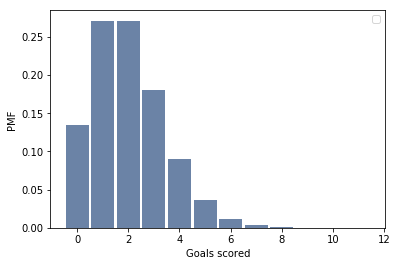

In [6]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import thinkstats2
import thinkplot



def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

def SimulateGame(lam):
    """Simulates a game and returns the estimated goal-scoring rate.

    lam: actual goal scoring rate in goals per game
    """
    goals = 0
    t = 0
    while True:
        time_between_goals = random.expovariate(lam)
        t += time_between_goals
        if t > 1:
            break
        goals += 1

    # estimated goal-scoring rate is the actual number of goals scored
    L = goals
    return L

# Solution

# The following function simulates many games, then uses the
# number of goals scored as an estimate of the true long-term
# goal-scoring rate.

def Estimate6(lam=2, m=1000000):

    estimates = []
    for i in range(m):
        L = SimulateGame(lam)
        estimates.append(L)

    print('Experiment 4')
    print('rmse L', RMSE(estimates, lam))
    print('mean error L', MeanError(estimates, lam))
    
    pmf = thinkstats2.Pmf(estimates)
    thinkplot.Hist(pmf)
    thinkplot.Config(xlabel='Goals scored', ylabel='PMF')
    
Estimate6()

In [7]:
# Solution

# My conclusions:

# 1) RMSE for this way of estimating lambda is 1.4

# 2) The mean error is small and decreases with m, so this estimator
#    appears to be unbiased.

# One note: If the time between goals is exponential, the distribution
# of goals scored in a game is Poisson.

# See https://en.wikipedia.org/wiki/Poisson_distribution